<a href="https://colab.research.google.com/github/gyq1985/deepmindset/blob/main/data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
from pathlib import Path
import shutil
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

DATA_DIR = "/content/drive/Shared drives/Deepmindset/dataset/COVID-19_Radiography_Dataset"


CATEGORIES = ["COVID", "Lung_Opacity", "Normal", "Viral Pneumonia"]

In [ ]:
image_counts = {}
mask_mismatch = {}

for cat in CATEGORIES:
    img_dir = Path(DATA_DIR) / cat / "images"
    mask_dir = Path(DATA_DIR) / cat / "masks"

    if not img_dir.exists():
        print(f"⚠️ Skipping {cat} — images folder not found!")
        continue

    img_files = sorted([f for f in os.listdir(img_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))])
    mask_files = sorted([f for f in os.listdir(mask_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))])

    image_counts[cat] = len(img_files)

    mismatch = [f for f in img_files if f not in mask_files]
    mask_mismatch[cat] = mismatch

In [ ]:

print("📊 Image Counts:")
for k, v in image_counts.items():
    print(f"{k}: {v} images")


print("\n⚠️ Missing Masks:")
for k, v in mask_mismatch.items():
    print(f"{k}: {len(v)} unmatched mask files")

📊 Image Counts:
COVID: 3616 images
Lung_Opacity: 6012 images
Normal: 10192 images
Viral Pneumonia: 1345 images

⚠️ Missing Masks:
COVID: 0 unmatched mask files
Lung_Opacity: 0 unmatched mask files
Normal: 0 unmatched mask files
Viral Pneumonia: 0 unmatched mask files


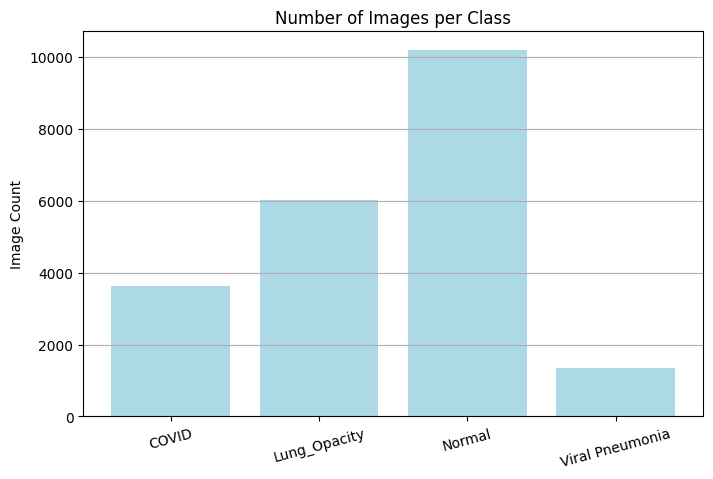

In [ ]:

plt.figure(figsize=(8, 5))
plt.bar(image_counts.keys(), image_counts.values(), color='lightblue')
plt.title("Number of Images per Class")
plt.ylabel("Image Count")
plt.xticks(rotation=15)
plt.grid(axis='y')
plt.show()

In [ ]:

def show_mask_overlay(category, index=0):
    img_path = Path(DATA_DIR) / category / "images"
    mask_path = Path(DATA_DIR) / category / "masks"

    img_files = sorted([f for f in os.listdir(img_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))])
    mask_files = sorted([f for f in os.listdir(mask_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))])

    if index >= len(img_files):
        print("❗ Index 超出范围")
        return

    img = cv2.imread(str(img_path / img_files[index]), cv2.IMREAD_GRAYSCALE)
    mask = cv2.imread(str(mask_path / mask_files[index]), cv2.IMREAD_GRAYSCALE)

    img_resized = cv2.resize(img, (256, 256))
    mask_resized = cv2.resize(mask, (256, 256))

    plt.figure(figsize=(10, 4))

    plt.subplot(1, 3, 1)
    plt.imshow(img_resized, cmap='gray')
    plt.title("X-ray Image")

    plt.subplot(1, 3, 2)
    plt.imshow(mask_resized, cmap='gray')
    plt.title("Lung Mask")

    plt.subplot(1, 3, 3)
    plt.imshow(img_resized, cmap='gray')
    plt.imshow(mask_resized, cmap='Reds', alpha=0.4)
    plt.title("Overlay")

    plt.tight_layout()
    plt.show()

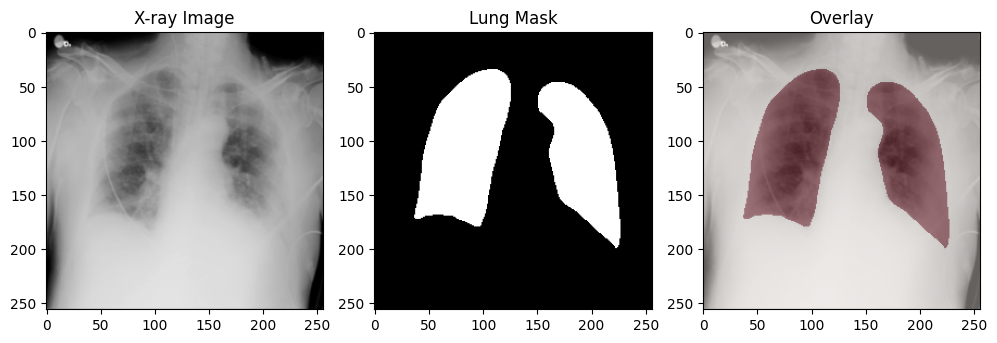

In [ ]:

show_mask_overlay("COVID", index=0)

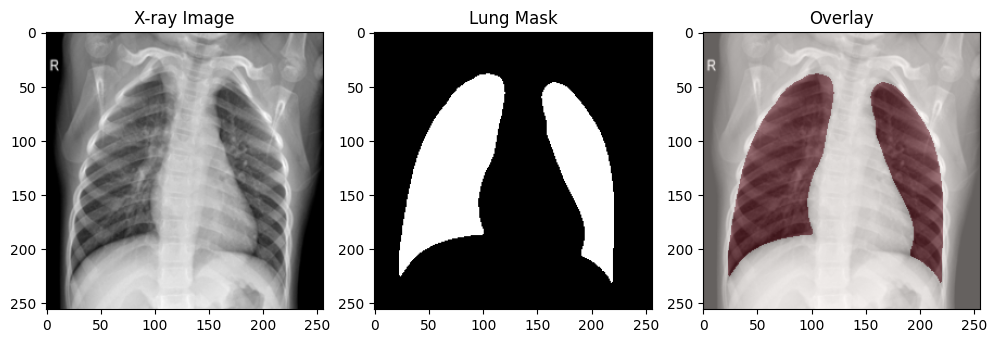

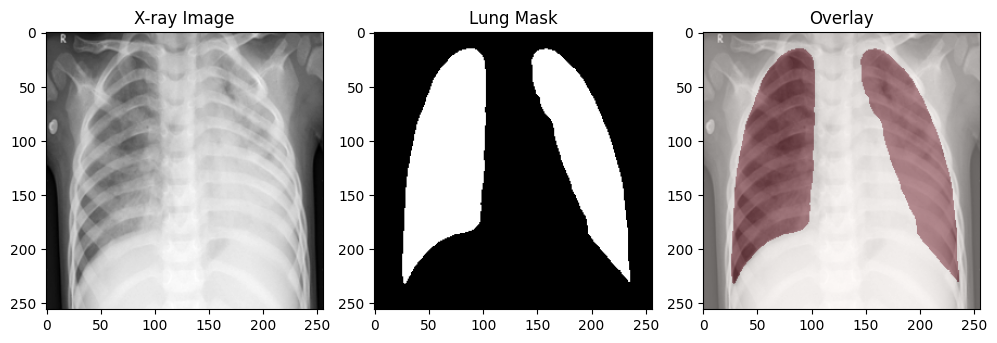

In [ ]:
show_mask_overlay("Normal", index=2)
show_mask_overlay("Viral Pneumonia", index=1)

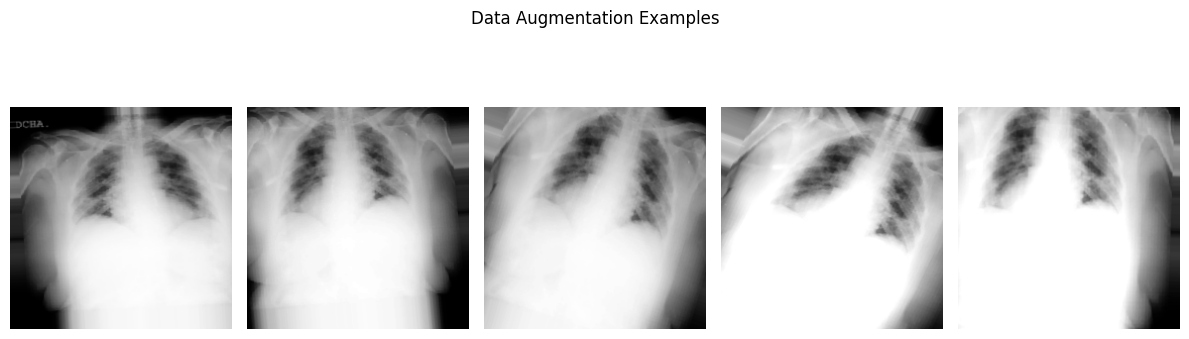

In [ ]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import array_to_img, img_to_array, load_img


example_image_path = str(Path(DATA_DIR) / "COVID" / "images" / os.listdir(Path(DATA_DIR) / "COVID" / "images")[0])


img = load_img(example_image_path, target_size=(224, 224))
x = img_to_array(img)
x = x.reshape((1,) + x.shape)


aug = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=(0.6, 1.4),
    fill_mode='nearest'
)


plt.figure(figsize=(12, 4))
for i, batch in enumerate(aug.flow(x, batch_size=1)):
    plt.subplot(1, 5, i + 1)
    plt.imshow(array_to_img(batch[0]))
    plt.axis('off')
    if i == 4:
        break
plt.suptitle("Data Augmentation Examples")
plt.tight_layout()
plt.show()

In [ ]:
import os
import cv2
import shutil
from pathlib import Path


CLEAN_DIR = "/content/drive/Shared drives/Deepmindset/dataset/clean_dataset"
os.makedirs(CLEAN_DIR, exist_ok=True)


for cat in CATEGORIES:
    src_dir = Path(DATA_DIR) / cat / "images"
    dest_dir = Path(CLEAN_DIR) / "images" / cat
    os.makedirs(dest_dir, exist_ok=True)

    copied = 0
    for fname in sorted(os.listdir(src_dir)):
        if copied >= 1200:
            break
        if not fname.lower().endswith(('.png', '.jpg', '.jpeg')):
            continue
        src_file = src_dir / fname
        dst_file = dest_dir / fname
        try:
            img = cv2.imread(str(src_file))
            if img is None or img.shape[0] < 50 or img.shape[1] < 50:
                continue
            shutil.copyfile(src_file, dst_file)
            copied += 1
        except:
            continue
    print(f"✅ {cat}: Copied {copied} valid images to clean_dataset")

✅ COVID: Copied 1200 valid images to clean_dataset
✅ Lung_Opacity: Copied 1200 valid images to clean_dataset
✅ Normal: Copied 1200 valid images to clean_dataset
✅ Viral Pneumonia: Copied 1200 valid images to clean_dataset
